In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Artworks.csv')
df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [3]:
df = df.dropna(axis=0, how='any', subset=['Title', 'Artist', 'DateAcquired'])
answer_1 = df.shape[0]
answer_1

129930

In [4]:
answer_2 = len(df[df['Department'] == 'Photography']) / len(df)
answer_2

0.23909027938120525

In [5]:
answer_3 = len(df[df['Title'].str.contains('untitled', case=False, na=False)])
answer_3

18385

In [7]:
answer_4 = len(df[df['Medium'].str.contains('paper', case=False, na=False)])\
           / len(df[df['Medium'].str.contains('canvas', case=False, na=False)])
answer_4

9.190601900739177

In [10]:
non_na_durations = df['Duration (sec.)'].dropna(axis=0, how='any')
pos_non_na_durations = non_na_durations[non_na_durations > 0]
longer_10_hours_durations = pos_non_na_durations[pos_non_na_durations > 10*3600]
answer_5 = len(longer_10_hours_durations) / len(pos_non_na_durations)
answer_5

0.013015184381778741

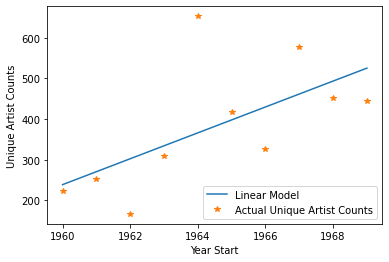

0.3827817923591247

In [11]:
df['DateAcquired'] = pd.to_datetime(df['DateAcquired'])
unique_artist_count = df.groupby(pd.Grouper(key="DateAcquired", freq="1AS"))['Artist'].nunique()
unique_artist_1960_to_1970 = unique_artist_count[31:41]
year_list = np.linspace(1960, 1969, 10).reshape(-1, 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(year_list, list(unique_artist_1960_to_1970))
plt.plot(year_list, model.predict(np.linspace(1960, 1969, 10).reshape(-1, 1)), label='Linear Model')
plt.plot(year_list, unique_artist_1960_to_1970, '*', label='Actual Unique Artist Counts')
plt.legend()
plt.xlabel('Year Start')
plt.ylabel('Unique Artist Counts')
plt.show()

answer_6 = model.score(year_list, unique_artist_1960_to_1970)
answer_6

In [22]:
df_pos_width_height = df[(df['Width (cm)'] > 0) & (df['Height (cm)'] > 0)]
aspect_ratio = df_pos_width_height['Width (cm)'] / df_pos_width_height['Height (cm)']
gold_ratio_works = aspect_ratio[abs(aspect_ratio - 1.618) <= 1.618*0.01]
inv_gold_ratio_works = aspect_ratio[abs(1/aspect_ratio - 1.618) <= 1.618*0.01]
answer_7 = (len(gold_ratio_works) + len(inv_gold_ratio_works)) / len(aspect_ratio)
answer_7

0.01079715347771951

In [23]:
art_count = df.groupby(pd.Grouper(key="DateAcquired", freq="1AS"))['Title'].count()
art_count = art_count.to_frame(name='Art_Acquired')
art_count['%Change_From_Last_Year'] = art_count['Art_Acquired'].pct_change()*100
art_count_2000_to_2010 = art_count[-21:-11]
sp_500_2000_to_2010 = pd.DataFrame(data=[1335.63, 1140.21, 895.84, 1132.52, 1181.41,
                                         1278.73, 1424.16, 1378.76, 865.58, 1123.58],
                                   columns=['Price'],
                                   index=art_count_2000_to_2010.index) 
sp_500_2000_to_2010['%Change_From_Last_Year'] = sp_500_2000_to_2010['Price'].pct_change()*100
sp_500_2000_to_2010.iloc[0, 1] = (1335.63 - 1425.59) / 1425.59 * 100

from scipy.stats import pearsonr
answer_8, _ = pearsonr(art_count_2000_to_2010['%Change_From_Last_Year'], sp_500_2000_to_2010['%Change_From_Last_Year'])
answer_8

-0.2154908173945071